In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from prettytable import PrettyTable

In [340]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\dataset.csv")
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [341]:
x = df[['x']].values
y = df['y'].values
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size = 0.75, random_state=1)

In [342]:
test_error = []
r2_score = []

### Linear Regression

In [343]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
R2_score = lreg.score(x_val,y_val)
y_pred = lreg.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
test_error.append(mse)
r2_score.append(R2_score)

x1 = np.linspace(x.min(),x.max())
idx = np.argsort(x_val[:,0])
x_val1 = x_val[:,0][idx]
y_pred = y_pred[idx]
y1=lreg.predict(x1.reshape(-1,1))

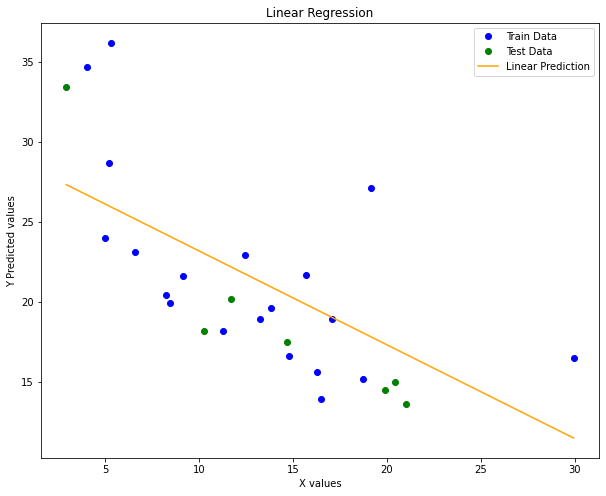

In [344]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_train,y_train, 'bo', label='Train Data')
ax.plot(x_val,y_val, 'go', label='Test Data')
ax.plot(x1,y1, ls='-',color='orange', label='Linear Prediction')
ax.set_title(label="Linear Regression")
ax.set_xlabel("X values")
ax.set_ylabel("Y Predicted values")
ax.legend()
plt.show()


### Polynomial Regression

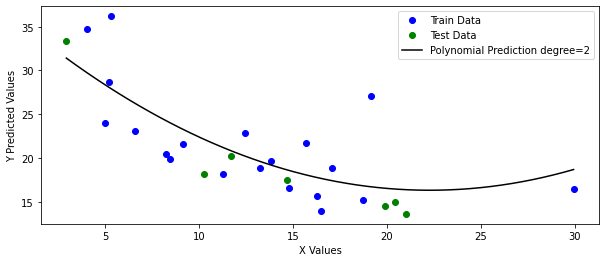

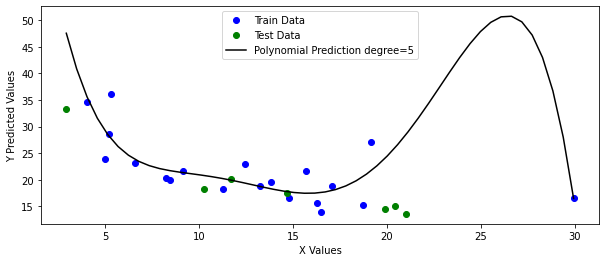

In [345]:
degree_list = [2, 5]
for i in degree_list:
    poly = PolynomialFeatures(include_bias=False,degree=i)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.fit_transform(x_val)

    lreg = LinearRegression()
    lreg.fit(x_poly_train, y_train)
    y_pred = lreg.predict(x_poly_val)
    R2_score = lreg.score(x_poly_val, y_val)
    mse = mean_squared_error(y_val, y_pred)
    test_error.append(mse)
    r2_score.append(R2_score)

    x1 = np.linspace(x.min(),x.max()).reshape(-1,1)
    y1 = lreg.predict(poly.fit_transform(x1))

    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x_train,y_train, 'bo', label='Train Data')
    ax.plot(x_val,y_val, 'go', label='Test Data')
    ax.plot(x1,y1,'k-', label=f'Polynomial Prediction degree={i}')
    ax.set_xlabel("X Values")
    ax.set_ylabel("Y Predicted Values")
    ax.legend()
    plt.show()

### KNN Regression

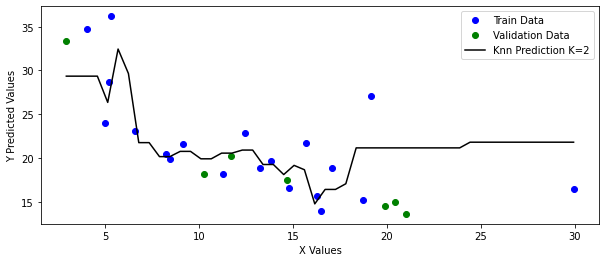

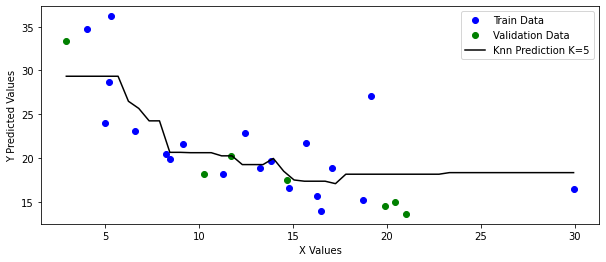

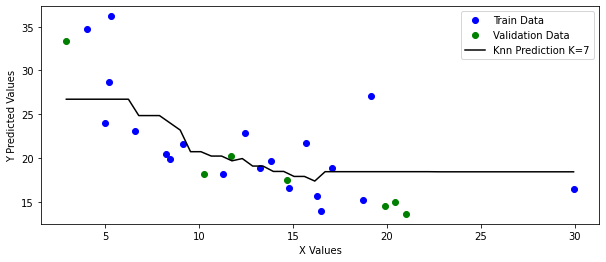

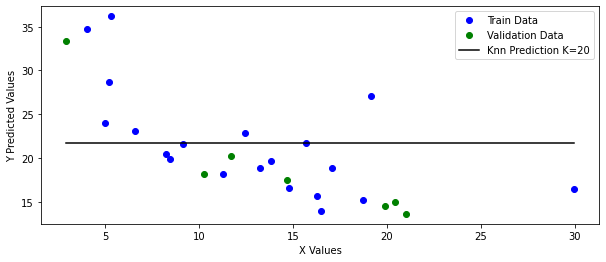

In [346]:
n = [2,5,7,20]
for idx, i in enumerate(n):
    knn = KNeighborsRegressor(int(i))
    knn.fit(x_train,y_train)
    R2_score = knn.score(x_val,y_val)
    y_pred = knn.predict(x_val)
    mse = mean_squared_error(y_val,y_pred)
    r2_score.append(R2_score)
    test_error.append(mse)

    x2 = np.linspace(x.min(), x.max()).reshape(-1,1)
    y2 = knn.predict(x2)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x_train,y_train,'bo',label='Train Data')
    ax.plot(x_val,y_val,'go',label='Validation Data')
    ax.plot(x2,y2,'k-', label=f'Knn Prediction K={i}')
    ax.set_xlabel("X Values")
    ax.set_ylabel("Y Predicted Values")
    ax.legend()
    plt.show()

In [347]:
pt = PrettyTable()
pt.field_names = ["Model","MSE","r2 score"]
pt.add_row(["Linear Regression", round(test_error[0],2), round(r2_score[0],2)])
pt.add_row(["Polynomial Model with Degree 2", round(test_error[1],2), round(r2_score[1],2)])
pt.add_row(["Polynomial Model with Degree 5", round(test_error[2],2), round(r2_score[2],2)])
pt.add_row(["KNN Model with k=2", round(test_error[3],2), round(r2_score[3],2)])
pt.add_row(["KNN Model with k=5", round(test_error[4],2), round(r2_score[4],2)])
pt.add_row(["KNN Model with k=7", round(test_error[5],2), round(r2_score[5],2)])
pt.add_row(["KNN Model with k=20", round(test_error[6],2), round(r2_score[6],2)])
print(pt)

+--------------------------------+-------+----------+
|             Model              |  MSE  | r2 score |
+--------------------------------+-------+----------+
|       Linear Regression        | 13.58 |   0.66   |
| Polynomial Model with Degree 2 |  5.01 |   0.87   |
| Polynomial Model with Degree 5 | 92.27 |  -1.33   |
|       KNN Model with k=2       | 22.69 |   0.43   |
|       KNN Model with k=5       |  9.56 |   0.76   |
|       KNN Model with k=7       | 14.35 |   0.64   |
|      KNN Model with k=20       | 47.26 |  -0.19   |
+--------------------------------+-------+----------+


In [348]:
index = ["Linear Regression","Polynomial Model with Degree 2","Polynomial Model with Degree 5","KNN Model with k=2","KNN Model with k=5","KNN Model with k=7", "KNN Model with k=20"]
# data = np.array(test_error, r2_score).reshape(-1,2)
dg= pd.DataFrame(index=index,columns=["MSE","R2 Score"])
for idx, i in enumerate(index):
    dg.loc[i] = [round(test_error[idx], 4), round(r2_score[idx], 4)]

In [349]:
idx = np.argsort(dg["MSE"].values)
dg.index = dg.index.values[idx] 
dg["R2 Score"] = dg["R2 Score"].values[idx] 
dg["MSE"] = dg["MSE"].values[idx] 


In [350]:
dg

,MSE,R2 Score
Polynomial Model with Degree 2,5.0118,0.8734
KNN Model with k=5,9.5609,0.7584
Linear Regression,13.5817,0.6568
KNN Model with k=7,14.3508,0.6374
KNN Model with k=2,22.6889,0.4267
KNN Model with k=20,47.2552,-0.194
Polynomial Model with Degree 5,92.2717,-1.3314
